In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
from numpy import where

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc


from plotly.subplots import make_subplots
import plotly.graph_objs as go
from collections import Counter


from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings(action='ignore')
from tabulate import tabulate

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier,plot_tree
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier,Pool
import optuna
from optuna.integration import CatBoostPruningCallback
import xgboost as xgb

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import time

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [ ]:
from hyperopt import fmin, tpe, hp, rand, Trials, STATUS_OK

In [ ]:
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('second.csv')
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,3,0,0,0,0,95,18,0,0,1,0,0,0,0,0,1
1,0,58,1,0,1,1,87,39,0,0,1,0,0,0,1,0,0
2,1,8,0,0,1,1,110,17,0,0,1,0,0,0,1,0,0
3,1,70,0,0,0,0,69,35,0,1,0,0,0,0,1,0,0
4,1,52,0,0,1,1,77,17,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34607,1,10,0,0,1,1,58,20,0,0,1,0,0,0,0,0,1
34608,1,56,0,0,1,1,213,55,0,1,0,0,1,0,0,0,0
34609,1,82,1,0,1,1,91,28,0,1,0,0,0,0,1,0,0
34610,0,40,0,0,1,1,99,33,0,0,1,0,0,0,1,0,0


## Train-Test Split

In [ ]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
y_test

17561    0
30884    0
251      0
30728    0
22327    0
        ..
22524    0
5511     0
26349    0
1266     0
33675    0
Name: stroke, Length: 6923, dtype: int64

In [ ]:
#Общее количество
cou = Counter(y_train)
cou

Counter({0: 27187, 1: 502})

## Масштабирование данных

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)



In [ ]:
mean_per_feature = X_train_sc.mean()
print(mean_per_feature)

-1.1627891117096877e-18


In [ ]:
print(len(X_train_sc))
print(len(X_test_sc))

27689
6923


##  Балансировка данных при помощи Random Oversampling

In [ ]:


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

oversample = RandomOverSampler(random_state=42,sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_sc, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

Before OverSampling, counts of label '1': 502
Before OverSampling, counts of label '0': 27187 

After OverSampling, the shape of train_X: (54374, 16)
After OverSampling, the shape of train_y: (54374,) 

After OverSampling, counts of label '1': 27187
After OverSampling, counts of label '0': 27187


## Ансамблевые методы

# Random Oversampling

## 1. BOOSTING

### Кросс-Валидация

In [ ]:

list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_over,
        y=y_train_over,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,40.878965,0.049700,0.973443,0.974787,0.973443,0.973424
AdaBoostClassifier,1.602201,0.038514,0.780134,0.783522,0.780134,0.779474
XGBClassifier,0.647813,0.017302,0.967632,0.969609,0.967632,0.967597
LGBMClassifier,0.945132,0.017201,0.927557,0.935823,0.927557,0.927210
GradientBoostingClassifier,4.937207,0.015702,0.813606,0.818541,0.813606,0.812882


## 1. Прогнозирование с  CatBoostClassifier

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Fit Time: 6.8071 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6787
           1       0.09      0.24      0.13       136

    accuracy                           0.94      6923
   macro avg       0.54      0.60      0.55      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6467  320]
 [ 103   33]]


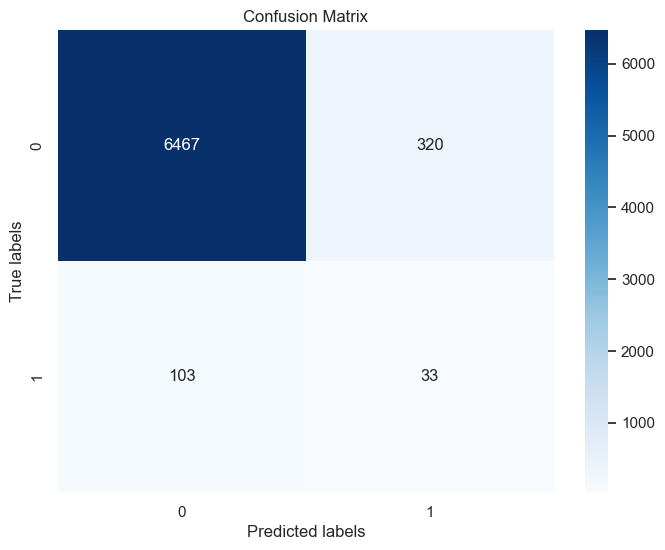

In [ ]:
# Старт времени
start_time = time.time()

# Обучение модели ансамбля
cat_model = CatBoostClassifier(verbose=False,random_state=42).fit(X_train_over, y_train_over,plot=True,  verbose=False)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")

# Предсказание на тестовой выборке
y_pred = cat_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Получение предсказанных вероятностей для каждого класса
y_cat =cat_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_cat_class_1 = y_cat[:, 1]

# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_cat_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.7814983662538244


### Функция по запросу важности признаков

In [ ]:
# Вывод важности признаков
feature_importances = cat_model.get_feature_importance()

# Вывод наименований (порядковый номер)
feature_names = cat_model.feature_names_

# Создание словаря - сопоставление имени признака со степенью важности
feature_importance_dict = {feature_names[i]: importance for i, importance in enumerate(feature_importances)}

# Печать признаков
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

6: 29.0509
1: 26.5029
7: 19.1595
0: 3.7287
9: 3.0110
13: 2.5069
8: 2.2587
11: 2.2582
4: 2.2535
2: 2.2095
10: 2.1619
5: 1.6442
14: 1.6082
3: 1.4252
15: 0.2180
12: 0.0027


# Оптимизация гиперпараметров

## Optuna

### Гиперпараметры для CatBoost

***Прогнозирование f1_scores[1] с iterations= [500, 750, 1000] и с min_child_samples между  1 и 100***

In [ ]:
def objective(trial):
    # Опредлеление пространства поиска гиперпараметров, используя пробный объект
    ##Функции trial.suggest_int и trial.suggest_float используются для предложения целых
    #и чисел с плавающей запятой для гиперпараметров в указанных диапазонах.
    param = {
        #suggest_categorical:  выбирает одно из возможных значений гиперпараметра из списка.
        'iterations': trial.suggest_categorical('iterations', [500, 750, 1000]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
         # Предлагаем целочисленное значение для гиперпараметра 'depth' между 10 и 15
        'depth': trial.suggest_int('depth', 6, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        # Предлагаем значение с плавающей запятой для гиперпараметра 'learning_rate' между 0.01 и 0.05
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),
        'task_type': 'GPU',
        'devices': '0:1',
        'verbose': False
    }

    # Инициализация CatBoostClassifier с предложенными выше параметрами
    model = CatBoostClassifier(**param)

    # Обучение модели
    model.fit(X_train_over, y_train_over)

    # Предсказание на тестовой выборке
    preds = model.predict(X_test_sc)

    # Подсчет F1 score для каждого класса
    f1_scores = f1_score(y_test, preds, average=None)

    # Подсчет F1 score для класса 1
    f1_class_1 = f1_scores[1]

    return f1_class_1
# Создание объекта исследования Optuna и указываем направление «максимизировать», поскольку необходимо максимизировать оценку F1.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Указываем количество испытаний
print(study.best_trial)

# После завершения оптимизации получаем лучший набор гипрепараметров
best_params = study.best_trial.params

# Создаем лучшую модель (зачем мы это делаем дважды)
best_model = CatBoostClassifier(**best_params, task_type='GPU', devices='0:1', verbose=False)
best_model.fit(X_train_over, y_train_over)


[I 2024-01-16 18:33:06,193] A new study created in memory with name: no-name-b8a45343-0dfb-4f48-8709-9ab748698f42
[I 2024-01-16 18:33:14,804] Trial 0 finished with value: 0.11837237977805179 and parameters: {'iterations': 1000, 'auto_class_weights': None, 'depth': 6, 'min_child_samples': 76, 'learning_rate': 0.04810756319860492, 'bagging_temperature': 6.5993126463657585, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.11837237977805179.
[I 2024-01-16 18:33:23,486] Trial 1 finished with value: 0.1134020618556701 and parameters: {'iterations': 1000, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'min_child_samples': 91, 'learning_rate': 0.03756343570790192, 'bagging_temperature': 7.601749692454907, 'l2_leaf_reg': 3}. Best is trial 0 with value: 0.11837237977805179.
[I 2024-01-16 18:33:29,855] Trial 2 finished with value: 0.1277056277056277 and parameters: {'iterations': 750, 'auto_class_weights': 'Balanced', 'depth': 7, 'min_child_samples': 95, 'learning_rate': 0.020887782738014376, 

FrozenTrial(number=57, state=TrialState.COMPLETE, values=[0.14392059553349879], datetime_start=datetime.datetime(2024, 1, 16, 18, 40, 46, 122084), datetime_complete=datetime.datetime(2024, 1, 16, 18, 40, 53, 757150), params={'iterations': 1000, 'auto_class_weights': None, 'depth': 6, 'min_child_samples': 15, 'learning_rate': 0.026767776946397436, 'bagging_temperature': 0.6952823605879357, 'l2_leaf_reg': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': CategoricalDistribution(choices=(500, 750, 1000)), 'auto_class_weights': CategoricalDistribution(choices=(None, 'Balanced', 'SqrtBalanced')), 'depth': IntDistribution(high=10, log=False, low=6, step=1), 'min_child_samples': IntDistribution(high=100, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=0.05, log=False, low=0.01, step=None), 'bagging_temperature': FloatDistribution(high=10.0, log=False, low=0.0, step=None), 'l2_leaf_reg': IntDistribution(high=5, log=False, low=1, step=1)

In [ ]:
best_params

{'iterations': 1000,
 'auto_class_weights': 'Balanced',
 'depth': 7,
 'min_child_samples': 56,
 'learning_rate': 0.021249220135342372,
 'bagging_temperature': 0.5736661290941693,
 'l2_leaf_reg': 3}

In [ ]:
# ЗАПУСКАЕМ ОББУЧЕНИЕ ЕЩЕ РАЗ ДЛЯ ТОГО, ЧТОБЫ ЗАФИКСИРОВАТЬ FIT_TIME
best_params = {
    'iterations': 1000,
    'auto_class_weights': 'Balanced',
    'depth': 7,
    'min_child_samples': 56,
    'learning_rate': 0.021249220135342372,
    'bagging_temperature': 0.5736661290941693,
    'l2_leaf_reg': 3
}


# Создаем лучшую модель
best_model = CatBoostClassifier(**best_params, task_type='GPU', devices='0:1', verbose=False)
# Старт времени
start_time = time.time()

# Обучение
best_model.fit(X_train_over, y_train_over)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")



Fit Time: 7.9706 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6787
           1       0.09      0.38      0.15       136

    accuracy                           0.91      6923
   macro avg       0.54      0.65      0.55      6923
weighted avg       0.97      0.91      0.94      6923

Confusion Matrix:
[[6282  505]
 [  84   52]]


Text(67.25, 0.5, 'True labels')

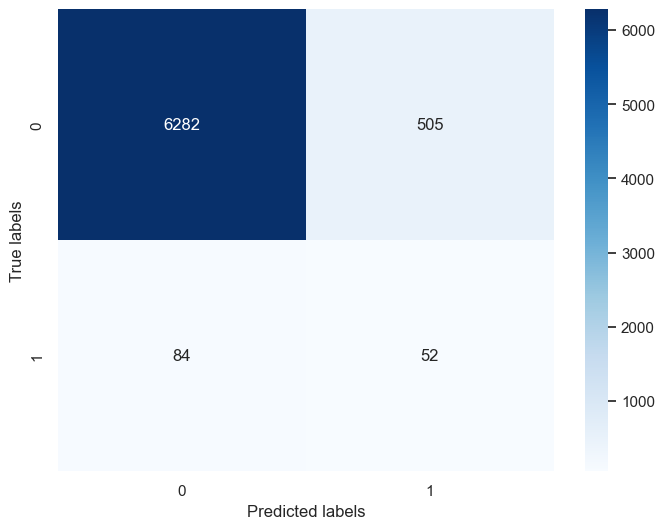

In [ ]:
# Предсказание на тестовой выборке
y_pred =best_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')


In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_pred_pr = best_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_pr_class_1 = y_pred_pr[:, 1]


In [ ]:
# Расчет AUC-ROC
auc = roc_auc_score(y_test, y_pred_pr_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.7975779821284635


***Прогнозирование f1_scores[1] с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 200***



In [ ]:
def objective(trial):
    param = {
        'iterations': trial.suggest_categorical('iterations', [500, 750, 1000,2000,3000]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
        'depth': trial.suggest_int('depth', 7, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),
        'task_type': 'GPU',
        'devices': '0:1',
        'verbose': False
    }

    model = CatBoostClassifier(**param)
    model.fit(X_train_over, y_train_over)
    preds = model.predict(X_test_sc)
    f1_scores = f1_score(y_test, preds, average=None)
    f1_class_1 = f1_scores[1]
    return f1_class_1
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=200)

# Вывод лучших гиперпараметров
best_params_1 = study_1.best_trial.params
print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")

print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Вывод лучших гиперпараметров (Альтернативый вариант)
print("\nBest trial parameters: ", study_1.best_params)
print("Best trial F1  f1_class_1 score: ", study_1.best_value)

# Создание лучшей модели
best_model_1 = CatBoostClassifier(**best_params_1, task_type='GPU', devices='0:1', verbose=False)
best_model_1.fit(X_train_over, y_train_over)


[I 2024-01-07 15:59:28,284] A new study created in memory with name: no-name-ea4c54c3-e618-4a29-a75b-ba6990a37be9
[I 2024-01-07 15:59:41,549] Trial 0 finished with value: 0.039840637450199196 and parameters: {'iterations': 750, 'auto_class_weights': None, 'depth': 10, 'min_child_samples': 196, 'learning_rate': 0.03018136170786264, 'bagging_temperature': 0.8332965104464263, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.039840637450199196.
[I 2024-01-07 15:59:47,243] Trial 1 finished with value: 0.1384180790960452 and parameters: {'iterations': 750, 'auto_class_weights': 'Balanced', 'depth': 7, 'min_child_samples': 127, 'learning_rate': 0.025666732426801946, 'bagging_temperature': 2.005525096538064, 'l2_leaf_reg': 2}. Best is trial 1 with value: 0.1384180790960452.
[I 2024-01-07 16:00:09,811] Trial 2 finished with value: 0.10733452593917711 and parameters: {'iterations': 3000, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'min_child_samples': 58, 'learning_rate': 0.013183264783640

Best trial: 142
  Value: 0.5540253131437799
  Params: 
    iterations: 2000
    auto_class_weights: None
    depth: 7
    min_child_samples: 168
    learning_rate: 0.027205883677245454
    bagging_temperature: 8.173192899925498
    l2_leaf_reg: 4

Best trial parameters:  {'iterations': 750, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'min_child_samples': 119, 'learning_rate': 0.01351906968112092, 'bagging_temperature': 2.5899058727119306, 'l2_leaf_reg': 2}
Best trial F1  f1_class_1 score:  0.14388489208633093


In [ ]:
best_params_1


{'iterations': 750,
 'auto_class_weights': 'SqrtBalanced',
 'depth': 7,
 'min_child_samples': 119,
 'learning_rate': 0.01351906968112092,
 'bagging_temperature': 2.5899058727119306,
 'l2_leaf_reg': 2}

In [ ]:
best_params_1 = {
    'iterations': 750,
    'auto_class_weights': 'SqrtBalanced',
    'depth': 7,
    'min_child_samples': 119,
    'learning_rate': 0.01351906968112092,
    'bagging_temperature': 2.5899058727119306,
    'l2_leaf_reg': 2
}

best_model_1 = CatBoostClassifier(**best_params_1, task_type='GPU', devices='0:1', verbose=False)
start_time = time.time()
best_model_1.fit(X_train_over, y_train_over)
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")



Fit Time: 6.0634768009 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      6787
           1       0.08      0.59      0.14       136

    accuracy                           0.86      6923
   macro avg       0.54      0.73      0.53      6923
weighted avg       0.97      0.86      0.91      6923

Confusion Matrix:
[[5891  896]
 [  56   80]]


Text(67.25, 0.5, 'True labels')

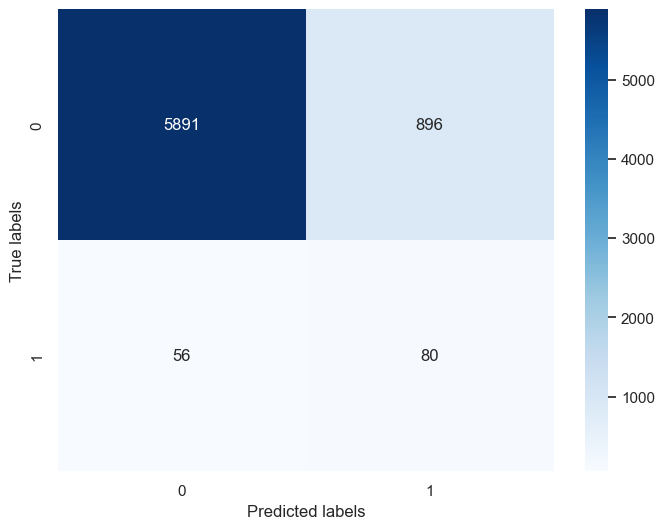

In [ ]:
# Предсказание на тестовой выборке
y_pred_1 =best_model_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_1)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_pred_proba_1 = best_model_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_proba_1_class_1 = y_pred_proba_1[:, 1]

In [ ]:
# Расчет AUC-ROC
auc_2 = roc_auc_score(y_test, y_pred_proba_1_class_1)
print(f"AUC-ROC_1: {auc_2}")


AUC-ROC_1: 0.8155372728139436


In [ ]:
# Сохранияем модель
with open('best_model_1.pkl', 'wb') as file:
    pickle.dump(best_model_1, file)

In [ ]:
# Загружаем модель
with open('best_model_1.pkl', 'rb') as file:
    loaded_best_model_1 = pickle.load(file)

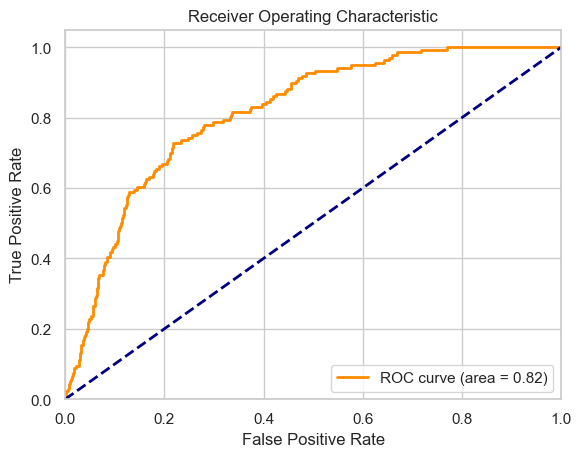

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_1_class_1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

***Прогнозирование f1_average macro с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 300***

In [ ]:
def objective(trial):
    param = {
        'iterations': trial.suggest_categorical('iterations', [500, 750, 1000,2000,3000]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
        'depth': trial.suggest_int('depth', 7, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),
        'task_type': 'GPU',
        'devices': '0:1',
        'verbose': False
    }

    model = CatBoostClassifier(**param)
    model.fit(X_train_over, y_train_over)
    preds = model.predict(X_test_sc)
    f1 = f1_score(y_test, preds, average='macro')

    return f1
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=300)

best_trial = study_2.best_trial

print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")

print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")


print("\nBest trial parameters: ", study_2.best_params)
print("Best trial F1 macro score: ", study_2.best_value)

best_params_2 = study_2.best_trial.params

best_model_2 = CatBoostClassifier(**best_params_2, task_type='GPU', devices='0:1', verbose=False)
best_model_2.fit(X_train_over, y_train_over)


[I 2024-01-07 14:15:04,719] A new study created in memory with name: no-name-d364a477-e537-4b5c-a840-277c51c1dafa
[I 2024-01-07 14:15:40,840] Trial 0 finished with value: 0.5132685274016978 and parameters: {'iterations': 750, 'auto_class_weights': 'Balanced', 'depth': 12, 'min_child_samples': 128, 'learning_rate': 0.049411953493815906, 'bagging_temperature': 5.950971377090317, 'l2_leaf_reg': 4}. Best is trial 0 with value: 0.5132685274016978.
[I 2024-01-07 14:16:35,359] Trial 1 finished with value: 0.4975596933630231 and parameters: {'iterations': 2000, 'auto_class_weights': 'Balanced', 'depth': 11, 'min_child_samples': 251, 'learning_rate': 0.08927226842245702, 'bagging_temperature': 7.299522899050585, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.5132685274016978.
[I 2024-01-07 14:16:57,352] Trial 2 finished with value: 0.5037227747794158 and parameters: {'iterations': 3000, 'auto_class_weights': 'Balanced', 'depth': 7, 'min_child_samples': 106, 'learning_rate': 0.0336933052313558

Best trial: 142
  Value: 0.5540253131437799
  Params: 
    iterations: 2000
    auto_class_weights: None
    depth: 7
    min_child_samples: 168
    learning_rate: 0.027205883677245454
    bagging_temperature: 8.173192899925498
    l2_leaf_reg: 4

Best trial parameters:  {'iterations': 2000, 'auto_class_weights': None, 'depth': 7, 'min_child_samples': 168, 'learning_rate': 0.027205883677245454, 'bagging_temperature': 8.173192899925498, 'l2_leaf_reg': 4}
Best trial F1 macro score:  0.5540253131437799


In [ ]:
best_params_2 = {
    'iterations': 2000,
    'auto_class_weights': None,
    'depth': 7,
    'min_child_samples': 168,
    'learning_rate': 0.027205883677245454,
    'bagging_temperature': 8.173192899925498,
    'l2_leaf_reg': 4
}

start_time = time.time()

best_model_2 = CatBoostClassifier(**best_params_2, task_type='GPU', devices='0:1', verbose=False)
best_model_2.fit(X_train_over, y_train_over)

fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")

Fit Time: 15.5460712910 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.10      0.23      0.14       136

    accuracy                           0.94      6923
   macro avg       0.54      0.59      0.55      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6502  285]
 [ 105   31]]


Text(67.25, 0.5, 'True labels')

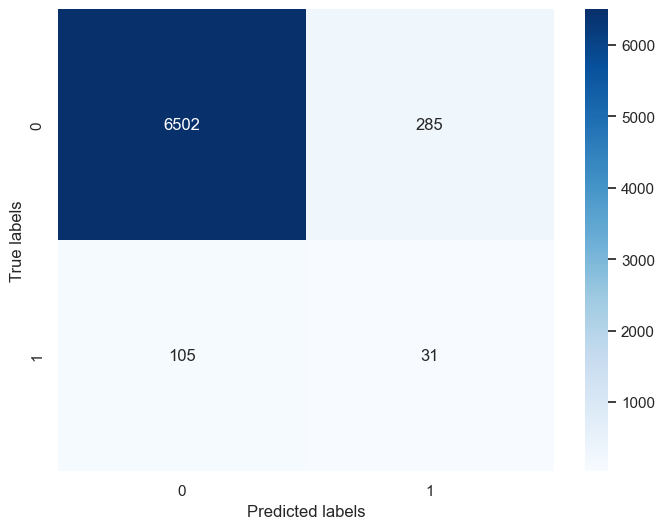

In [ ]:
# Предсказание на тестовой выборке
y_pred_ =best_model_2.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_))

# Матрица ошибок
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred_)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_pred_proba = best_model_2.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_proba_class_1 = y_pred_proba[:, 1]


In [ ]:
# Расчет AUC-ROC
auc_1 = roc_auc_score(y_test, y_pred_proba_class_1)
print(f"AUC-ROC_1: {auc_1}")


AUC-ROC_1: 0.7898751072552197


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_class_1)

In [ ]:
roc_auc = auc(fpr, tpr)

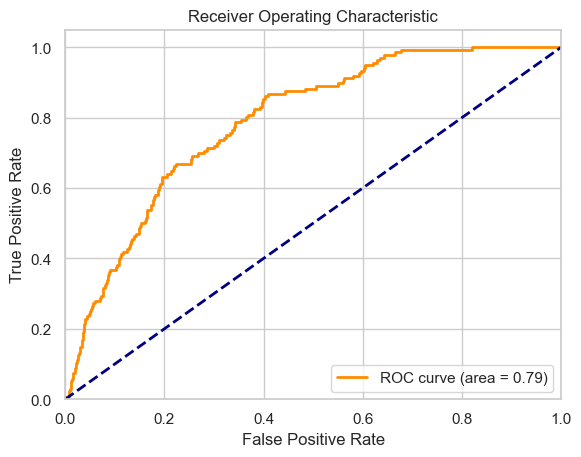

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# HyperOpt

### Гиперпараметры для CatBoost

***Прогнозирование f1_average macro с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 300***




In [ ]:
# Определение пространства поиска гиперпараметров
space = {
    'iterations': hp.choice('iterations', [500, 750, 1000, 2000, 3000]),
    'auto_class_weights': hp.choice('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
    'depth': hp.randint('depth', 7, 13), # randint включает нижнюю границу и исключает верхнюю, поэтому 13
    'min_child_samples': hp.randint('min_child_samples', 1, 301),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 10),
    'l2_leaf_reg': hp.randint('l2_leaf_reg', 1, 6),
    'task_type': 'GPU',
    'devices': '0:1',
    'verbose': False
}

# Функция для оптимизации
def objective(params):
    model = CatBoostClassifier(**params)
    model.fit(X_train_over, y_train_over)
    preds = model.predict(X_test_sc)
    f1 = f1_score(y_test, preds, average='macro')
    return -f1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=Trials()
)

print("Лучшие гиперпараметры:", best)

100%|██████████| 100/100 [37:50<00:00, 22.70s/trial, best loss: -0.5518165574746873] 
Лучшие гиперпараметры: {'auto_class_weights': 1, 'bagging_temperature': 8.142939381882787, 'depth': 8, 'iterations': 1, 'l2_leaf_reg': 1, 'learning_rate': 0.036157301791360084, 'min_child_samples': 278}


In [ ]:
best

{'auto_class_weights': 1,
 'bagging_temperature': 8.142939381882787,
 'depth': 8,
 'iterations': 1,
 'l2_leaf_reg': 1,
 'learning_rate': 0.036157301791360084,
 'min_child_samples': 278}

100%|██████████| 100/100 [37:50<00:00, 22.70s/trial, best loss: -0.5518165574746873]
Лучшие гиперпараметры: {'auto_class_weights': 1, 'bagging_temperature': 8.142939381882787, 'depth': 8, 'iterations': 1, 'l2_leaf_reg': 1, 'learning_rate': 0.036157301791360084, 'min_child_samples': 278}

In [ ]:
# Старт времени
start_time = time.time()

# Создание и обучение модели
hp_best_model = CatBoostClassifier(auto_class_weights ='Balanced', bagging_temperature= 8.142939381882787,depth= 8,iterations=750,
                                  l2_leaf_reg = 2,learning_rate =0.036157301791360084, min_child_samples =278,task_type='GPU',
                                   devices='0:1', verbose=False)

hp_best_model.fit(X_train_over, y_train_over)
# фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 7.2795717716 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.07      0.16      0.10       136

    accuracy                           0.94      6923
   macro avg       0.53      0.56      0.53      6923
weighted avg       0.96      0.94      0.95      6923

Confusion Matrix:
[[6497  290]
 [ 114   22]]


Text(67.25, 0.5, 'True labels')

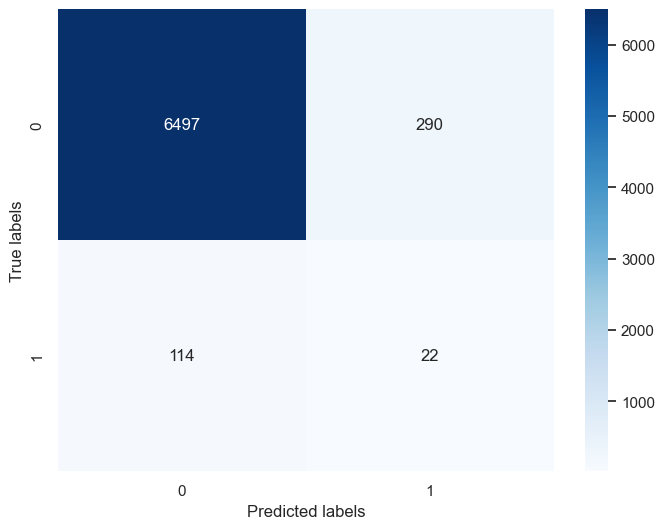

In [ ]:
# Предсказание на тестовой выборке
y_pred_hp =hp_best_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_hp))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_hp)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_pred_proba_hp = hp_best_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_proba_hp_class_1 = y_pred_proba_hp[:, 1]


In [ ]:
# Расчет AUC-ROC
auc_hp = roc_auc_score(y_test, y_pred_proba_hp_class_1)
print(f"AUC-ROC_hp: {auc_hp}")


AUC-ROC_hp: 0.7804301476005164


***Прогнозирование F1 score for class 1 с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 300**

In [ ]:
# Определение пространства поиска гиперпараметров
space = {
    'iterations': hp.choice('iterations', [500, 750, 1000, 2000, 3000]),
    'auto_class_weights': hp.choice('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
    'depth': hp.randint('depth', 7, 13), # randint включает нижнюю границу и исключает верхнюю, поэтому 13
    'min_child_samples': hp.randint('min_child_samples', 1, 301),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 10),
    'l2_leaf_reg': hp.randint('l2_leaf_reg', 1, 6),
    'task_type': 'GPU',
    'devices': '0:1',
    'verbose': False
}

# Функция для оптимизации
def objective(params):
    model = CatBoostClassifier(**params)
    model.fit(X_train_over, y_train_over)
    preds = model.predict(X_test_sc)
    # Подсчет F1-score для каждого класса
    f1_scores = f1_score(y_test, preds, average=None)

    # Подсчет F1-score для класса 1
    f1_class_1 = f1_scores[1]
    return -f1_class_1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
best_1 = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,
    trials=Trials()
)

print("Лучшие гиперпараметры:", best_1)

100%|██████████| 200/200 [1:05:57<00:00, 19.79s/trial, best loss: -0.14511041009463724]
Лучшие гиперпараметры: {'auto_class_weights': 2, 'bagging_temperature': 0.7310990650172309, 'depth': 7, 'iterations': 2, 'l2_leaf_reg': 3, 'learning_rate': 0.02384628272250222, 'min_child_samples': 224}


In [ ]:
best_1

{'auto_class_weights': 2,
 'bagging_temperature': 0.7310990650172309,
 'depth': 7,
 'iterations': 2,
 'l2_leaf_reg': 3,
 'learning_rate': 0.02384628272250222,
 'min_child_samples': 224}

best_1 ={'auto_class_weights': 2,
 'bagging_temperature': 0.7310990650172309,
 'depth': 7,
 'iterations': 2,
 'l2_leaf_reg': 3,
 'learning_rate': 0.02384628272250222,
 'min_child_samples': 224}


In [ ]:
# Старт времени
start_time = time.time()

# Создание и обучение модели
hp_best_model_1 = CatBoostClassifier(auto_class_weights ='SqrtBalanced', bagging_temperature= 0.7310990650172309,depth= 7,iterations=1000,
                                  l2_leaf_reg = 4,learning_rate =0.02384628272250222, min_child_samples =224,task_type='GPU',
                                   devices='0:1', verbose=False)

hp_best_model_1.fit(X_train_over, y_train_over)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 7.8752782345 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6787
           1       0.08      0.32      0.13       136

    accuracy                           0.92      6923
   macro avg       0.53      0.62      0.54      6923
weighted avg       0.97      0.92      0.94      6923

Confusion Matrix:
[[6303  484]
 [  93   43]]


Text(67.25, 0.5, 'True labels')

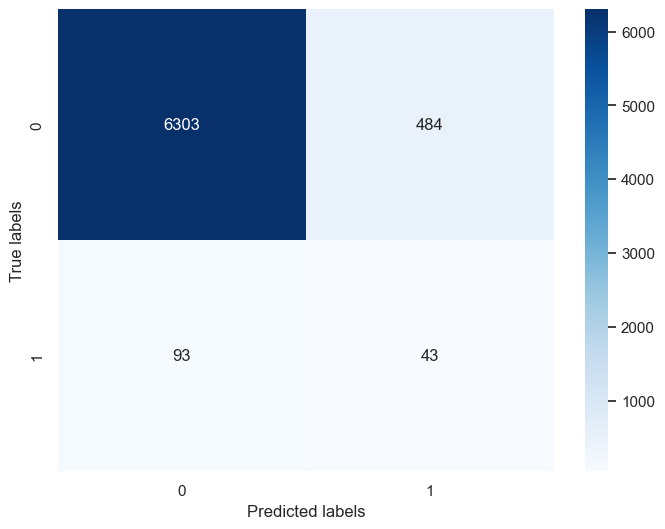

In [ ]:
# Предсказание на тестовой выборке
y_pred_hp_1 =hp_best_model_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_hp_1))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_hp_1)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_pr_pr_hp = hp_best_model_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pr_pr_hp_class_1 = y_pr_pr_hp[:, 1]


In [ ]:
# Расчет AUC-ROC
auc_hp_1 = roc_auc_score(y_test, y_pr_pr_hp_class_1)
print(f"AUC-ROC_hp_1: {auc_hp_1}")


AUC-ROC_hp_1: 0.8019732793662625


In [ ]:
# Сохранение модели
with open('hp_best_model_1.pkl', 'wb') as file:
    pickle.dump(hp_best_model_1, file)

In [ ]:
# Загрузка модели
with open('hp_best_model_1.pkl', 'rb') as file:
  hp_best_model_1 = pickle.load(file)

## Прогнозирование и оптимизация параметров XGBClassifier

### Параметры по умолчанию  xgb_model

Fit Time: 0.1512353420 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      6787
           1       0.08      0.28      0.12       136

    accuracy                           0.92      6923
   macro avg       0.53      0.61      0.54      6923
weighted avg       0.97      0.92      0.94      6923

Confusion Matrix:
[[6341  446]
 [  98   38]]


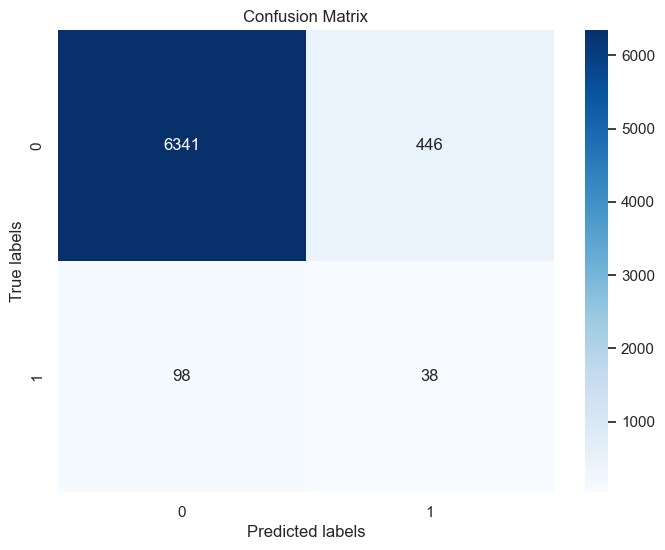

In [ ]:
# Старт времени
start_time = time.time()

# Обучение модели ансамбля
xgb_model = XGBClassifier().fit(X_train_over, y_train_over)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = xgb_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_pr_pr_xgb = xgb_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pr_pr_xgb_class_1 = y_pr_pr_xgb[:, 1]

In [ ]:
# Расчет AUC-ROC
auc_xgb = roc_auc_score(y_test, y_pr_pr_xgb_class_1)
print(f"AUC-ROC_XGB: {auc_xgb}")


AUC-ROC_XGB: 0.7843010859861846


***Построение графика по визуализации важности признаков в модели  xgb_model***

In [ ]:
# Предполагая, что X_train_over - это массив NumPy
X_train_over_df = pd.DataFrame(X_train_over)
# Копирование названий столбцов из X_train в X_train_over_df
X_train_over_df.columns = X_train.columns

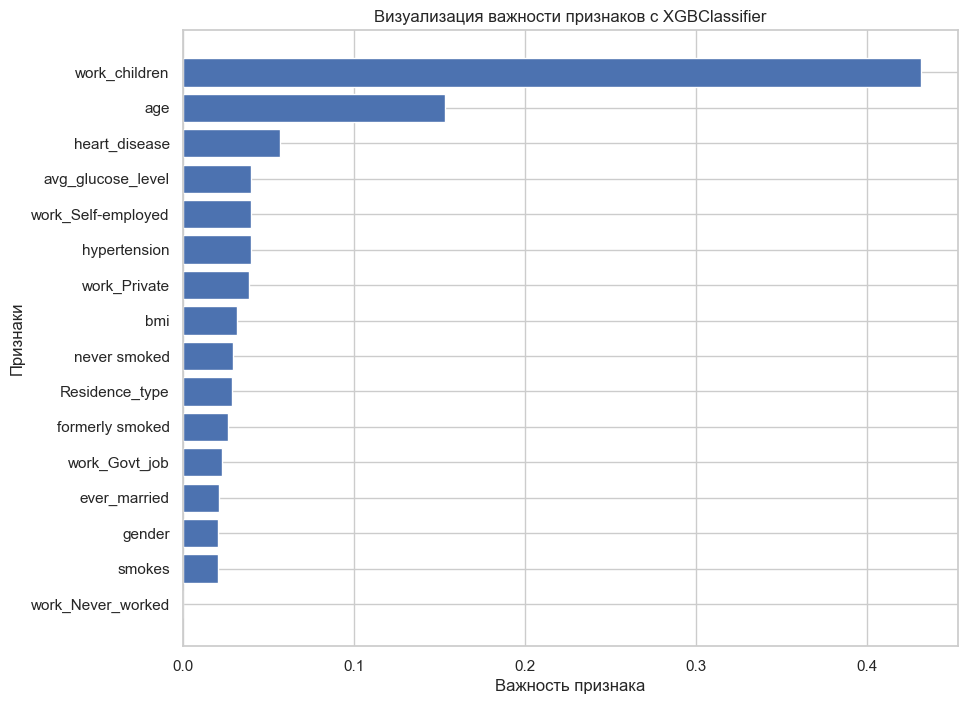

In [ ]:
# Получение важности признаков
feature_importances = xgb_model.feature_importances_
# Для лучшей визуализации, можно отсортировать признаки по важности
sorted_idx = feature_importances.argsort()

# Создание графика
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train_over_df.columns[i] for i in sorted_idx])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Визуализация важности признаков с XGBClassifier')
plt.show()

### HYPEROPT ОПТИМИЗАЦИЯ

**Прогнозирование** ***f1_class_1***

In [ ]:
# Определение пространства параметров
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),  # Количество деревьев
    'learning_rate': hp.loguniform('learning_rate', -3, 0),# Скорость обучения (learning rate)
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]), # Максимальная глубина деревьев
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),# Минимальное количество объектов в листе дерева
    'gamma': hp.loguniform('gamma', -3, 2),# Параметр регуляризации gamma
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Доля объектов для обучения каждого дерева
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),  # Доля признаков для обучения каждого дерева
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1) # Максимальное изменение весовых коэффициентов при обучении
}


    # Функция оптимизации
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'min_child_weight': int(params['min_child_weight']),
        'gamma': params['gamma'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'max_delta_step': int(params['max_delta_step'])
    }
    clf = xgb.XGBClassifier(**params)

    clf.fit(X_train_over, y_train_over)
    preds = clf.predict(X_test_sc)
    # F1-score для каждого класса
    f1_scores = f1_score(y_test, preds, average=None)

    # F1-score для класса 1
    f1_class_1 = f1_scores[1]
    return -f1_class_1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials)

print("Лучшие найденные гиперпараметры:")
print(best)

best = {'colsample_bytree': 0.6518323245271733, 'gamma': 0.0692966577333013, 'learning_rate': 0.08850344163899666, 'max_delta_step': 1.0, 'max_depth': 7, 'min_child_weight': 7.0, 'n_estimators': 80.0, 'subsample': 0.6454609159163801}

In [ ]:
# Лучшие найденные гиперпараметры
best_params = {
    'colsample_bytree': 0.6518323245271733,
    'gamma': 0.0692966577333013,
    'learning_rate': 0.08850344163899666,
    'max_delta_step': 1.0,
    'max_depth': 7,
    'min_child_weight': 7.0,
    'n_estimators': 80.0,
    'subsample': 0.6454609159163801
}

# Преобразование некоторых параметров к целым числам
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['max_delta_step'] = int(best_params['max_delta_step'])
start_time = time.time()
# Создание и обучение модели
xgb = XGBClassifier(**best_params)
xgb.fit(X_train_over, y_train_over)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 0.1609981060 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6787
           1       0.07      0.64      0.13       136

    accuracy                           0.83      6923
   macro avg       0.53      0.74      0.52      6923
weighted avg       0.97      0.83      0.89      6923

Confusion Matrix:
[[5680 1107]
 [  49   87]]


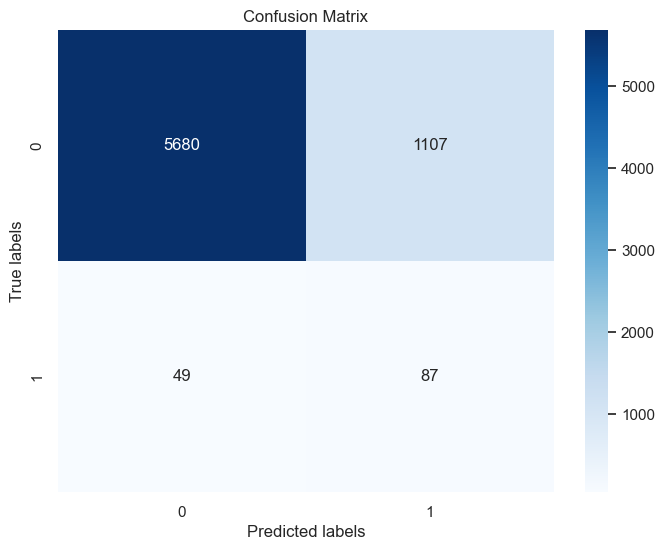

In [ ]:

# Предсказание на тестовой выборке
y_pred = xgb.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_xgb = xgb.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_xgb_class_1 = y_xgb[:, 1]

In [ ]:
# Расчет AUC-ROC
auc_xgb_1 = roc_auc_score(y_test,y_xgb_class_1)
print(f"AUC-ROC_XGB_1: {auc_xgb_1}")


AUC-ROC_XGB_1: 0.8293889052600559


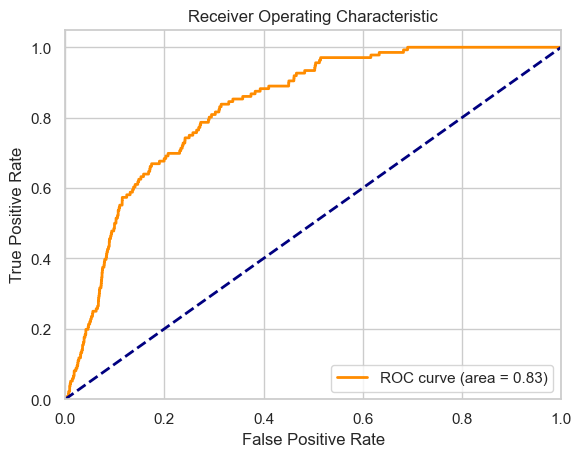

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_class_1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Сохренение модели
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)


In [ ]:
# Загрузка сохраненной модели
with open('xgb.pkl', 'rb') as file:
    loaded_xgb= pickle.load(file)

***Визуализация важности признаков для модели xgb***

In [ ]:
# Получение важности признаков
feature_importances_1 = xgb.feature_importances_
feature_importances_1

array([0.02067665, 0.15324314, 0.03980715, 0.05675407, 0.02118817,
       0.02861175, 0.03999857, 0.03138596, 0.02618602, 0.0291815 ,
       0.02056656, 0.02290376, 0.        , 0.03829321, 0.03982465,
       0.43137887], dtype=float32)

In [ ]:
# Для лучшей визуализации, можно отсортировать признаки по важности
sorted_idx_1 = feature_importances_1.argsort()
sorted_idx_1

array([12, 10,  0,  4, 11,  8,  5,  9,  7, 13,  2, 14,  6,  3,  1, 15],
      dtype=int64)

In [ ]:
# Предполагая, что X_train_over - это массив NumPy
X_train_over_df = pd.DataFrame(X_train_over)
# Копирование названий столбцов из X_train в X_train_over_df
X_train_over_df.columns = X_train.columns


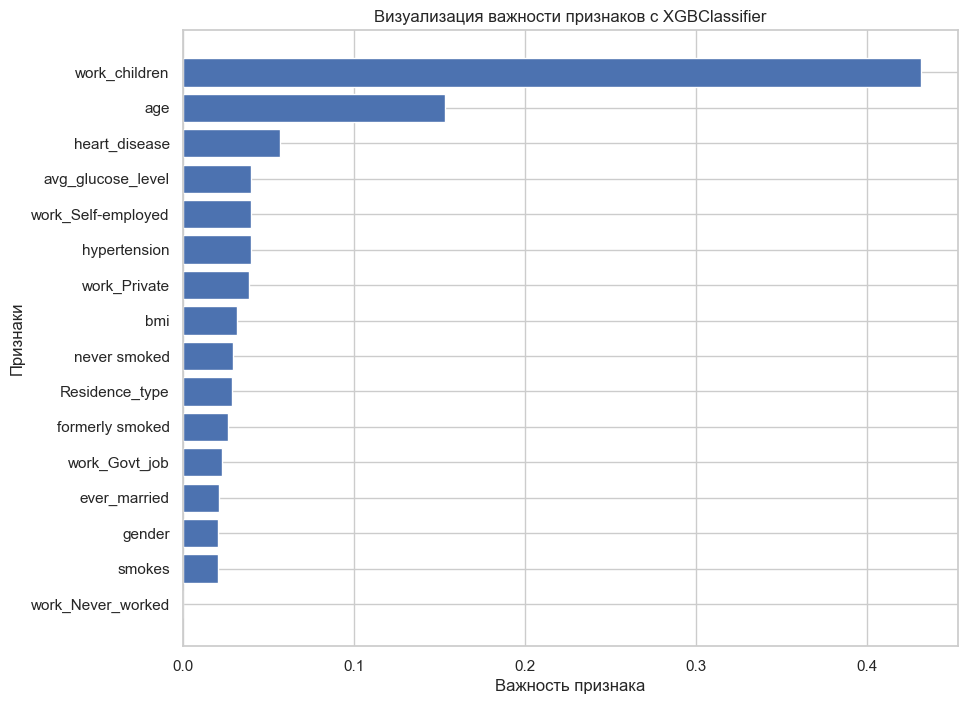

In [ ]:
# Получение важности признаков
feature_importances_1 = xgb.feature_importances_
# Для лучшей визуализации, можно отсортировать признаки по важности
sorted_idx_1 = feature_importances_1.argsort()

# Создание графика
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx_1)), feature_importances_1[sorted_idx_1], align='center')
plt.yticks(range(len(sorted_idx_1)), [X_train_over_df.columns[i] for i in sorted_idx_1])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Визуализация важности признаков с XGBClassifier')
plt.show()

### HYPEROPT ОПТИМИЗАЦИЯ

***Прогнозирование f1 = f1_score average='macro'***

In [ ]:
# Определение пространства параметров
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),  # Количество деревьев
    'learning_rate': hp.loguniform('learning_rate', -3, 0),# Скорость обучения (learning rate)
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]), # Максимальная глубина деревьев
    'min_child_weight': hp.quniform('min_child_weight', 1,10 , 1),# Минимальное количество объектов в листе дерева

    'gamma': hp.loguniform('gamma', -3, 2),# Параметр регуляризации gamma
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Доля объектов для обучения каждого дерева
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),  # Доля признаков для обучения каждого дерева
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1) # Максимальное изменение весовых коэффициентов при обучении
}


    # Функция оптимизации
def objective(params):


    clf = XGBClassifier(  # Использование класса XGBClassifier непосредственно
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        max_delta_step=int(params['max_delta_step'])
    )

    clf.fit(X_train_over, y_train_over)
    preds = clf.predict(X_test_sc)
    f1 = f1_score(y_test, preds, average='macro')
    return -f1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
trials = Trials()
best_1 = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=3000,
            trials=trials)

print("Лучшие найденные гиперпараметры:")
print(best_1)

100%|██████████| 3000/3000 [23:25<00:00,  2.13trial/s, best loss: -0.5587713741409256]
Лучшие найденные гиперпараметры:
{'colsample_bytree': 0.8058114279847318, 'gamma': 0.3277314983244731, 'learning_rate': 0.1471911100382243, 'max_delta_step': 7.0, 'max_depth': 5, 'min_child_weight': 6.0, 'n_estimators': 150.0, 'subsample': 0.8078399937475829}


In [ ]:
best_1

{'colsample_bytree': 0.8058114279847318,
 'gamma': 0.3277314983244731,
 'learning_rate': 0.1471911100382243,
 'max_delta_step': 7.0,
 'max_depth': 5,
 'min_child_weight': 6.0,
 'n_estimators': 150.0,
 'subsample': 0.8078399937475829}

In [ ]:
# Лучшие найденные гиперпараметры
best_params_1 ={'colsample_bytree': 0.8058114279847318,
 'gamma': 0.3277314983244731,
 'learning_rate': 0.1471911100382243,
 'max_delta_step': 7.0,
 'max_depth': 5,
 'min_child_weight': 6.0,
 'n_estimators': 150.0,
 'subsample': 0.8078399937475829}

# Преобразование некоторых параметров к целым числам
best_params_1['n_estimators'] = int(best_params_1['n_estimators'])
best_params_1['max_depth'] = int(best_params_1['max_depth'])
best_params_1['min_child_weight'] = int(best_params_1['min_child_weight'])
best_params_1['max_delta_step'] = int(best_params_1['max_delta_step'])
# Старт времени
start_time = time.time()
# Создание и обучение модели
xgb_1 = XGBClassifier(**best_params_1)
xgb_1.fit(X_train_over, y_train_over)
# Фиксания времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 0.2319912910 seconds


In [ ]:
# Получение важности признаков
feature_importances_2 = xgb_1.feature_importances_
feature_importances_2

array([0.03638291, 0.16702613, 0.04832383, 0.05997381, 0.03777483,
       0.02888615, 0.04597984, 0.04204901, 0.03029708, 0.04272627,
       0.0324064 , 0.03804245, 0.        , 0.03921523, 0.03904925,
       0.31186685], dtype=float32)

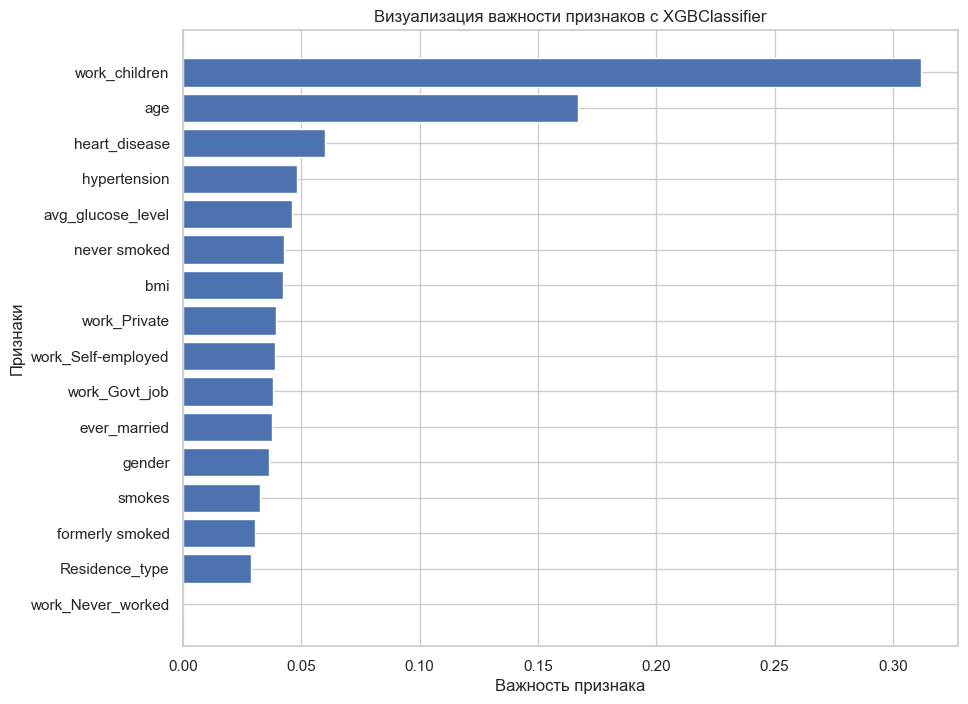

In [ ]:

sorted_idx_2 = feature_importances_2.argsort()

# Создание графика
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx_2)), feature_importances_2[sorted_idx_2], align='center')
plt.yticks(range(len(sorted_idx_2)), [X_train_over_df.columns[i] for i in sorted_idx_2])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Визуализация важности признаков с XGBClassifier')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6787
           1       0.06      0.47      0.11       136

    accuracy                           0.86      6923
   macro avg       0.53      0.67      0.52      6923
weighted avg       0.97      0.86      0.91      6923

Confusion Matrix:
[[5864  923]
 [  72   64]]


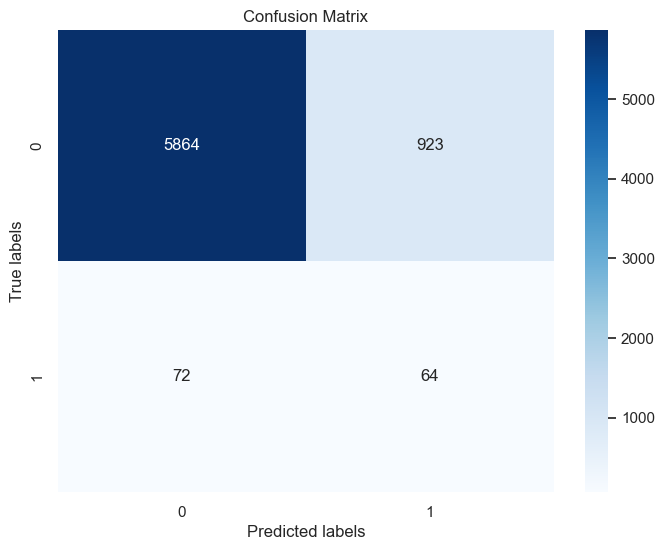

In [ ]:

# Предсказание на тестовой выборке
y_pred_1 = xgb_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_1)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Получение предсказанных вероятностей для каждого класса
y_xgb_1 = xgb_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_xgb_1_class_1 = y_xgb_1[:, 1]

In [ ]:
# Расчет AUC-ROC
auc_xgb_2 = roc_auc_score(y_test,y_xgb_1_class_1)
print(f"AUC-ROC_XGB_1: {auc_xgb_2}")


AUC-ROC_XGB_1: 0.8067932639388449


## Оптимизация гиперпараметров OPTUNA

***Прогнозирование f1 = f1_score average='macro'***

In [ ]:
def objective(trial):
    # Определение параметров
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1.0)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_loguniform('gamma', 1e-3, 100.0)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    max_delta_step = trial.suggest_int('max_delta_step', 0, 10)

    # Создание модели
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_delta_step=max_delta_step
    )

    # Обучение модели
    model.fit(X_train_over, y_train_over)

    # Предсказания
    preds = model.predict(X_test_sc)

    # Расчет F1-меры
    f1 = f1_score(y_test, preds, average='macro')

    return f1

# Создание исследования
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

best_trial = study.best_trial

print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")

print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Добавление параметра для GPU
best_params['tree_method'] = 'gpu_hist'

# Получаем лучший набор гиперпараметров
best_params = study.best_trial.params

# Создаем лучшую модель
best_model_xgb = XGBClassifier(**best_params, verbosity=0)
best_model_xgb.fit(X_train_over, y_train_over)

# Вывод результатов
print("Лучшие найденные гиперпараметры:")
print("\nBest trial parameters: ", study.best_params)
print("Best trial F1 macro score: ", study.best_value)


[I 2024-01-09 14:29:00,995] A new study created in memory with name: no-name-5882f60b-5248-45c4-a30d-e44e1c546c32
[I 2024-01-09 14:29:01,680] Trial 0 finished with value: 0.513943229064231 and parameters: {'n_estimators': 300, 'learning_rate': 0.002226269381962157, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.1198118085512006, 'subsample': 0.7095334686913596, 'colsample_bytree': 0.6426224996737894, 'max_delta_step': 7}. Best is trial 0 with value: 0.513943229064231.
[I 2024-01-09 14:29:01,817] Trial 1 finished with value: 0.48715534695082596 and parameters: {'n_estimators': 78, 'learning_rate': 0.0032020905728893955, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.002024266789186287, 'subsample': 0.6032450777635018, 'colsample_bytree': 0.656730989475036, 'max_delta_step': 1}. Best is trial 0 with value: 0.513943229064231.
[I 2024-01-09 14:29:02,352] Trial 2 finished with value: 0.5293482349454584 and parameters: {'n_estimators': 239, 'learning_rate': 0.012906061304917628, 'max_d

Best trial: 237
  Value: 0.5568281909768843
  Params: 
    n_estimators: 228
    learning_rate: 0.06824655441824423
    max_depth: 10
    min_child_weight: 3
    gamma: 0.0010128333269816376
    subsample: 0.9996908246037367
    colsample_bytree: 0.7352246360137676
    max_delta_step: 1
Лучшие найденные гиперпараметры:

Best trial parameters:  {'n_estimators': 228, 'learning_rate': 0.06824655441824423, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.0010128333269816376, 'subsample': 0.9996908246037367, 'colsample_bytree': 0.7352246360137676, 'max_delta_step': 1}
Best trial F1 macro score:  0.5568281909768843


In [ ]:
best_params = {
    'n_estimators': 228,
    'learning_rate': 0.06824655441824423,
    'max_depth': 10,
    'min_child_weight': 3,
    'gamma': 0.0010128333269816376,
    'subsample': 0.9996908246037367,
    'colsample_bytree': 0.7352246360137676,
    'max_delta_step': 1
}

start_time = time.time()

best_model_xgb = XGBClassifier(**best_params, verbosity=0)
best_model_xgb.fit(X_train_over, y_train_over)

fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")

Fit Time: 0.4639909267 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.10      0.24      0.14       136

    accuracy                           0.94      6923
   macro avg       0.54      0.60      0.56      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6495  292]
 [ 103   33]]


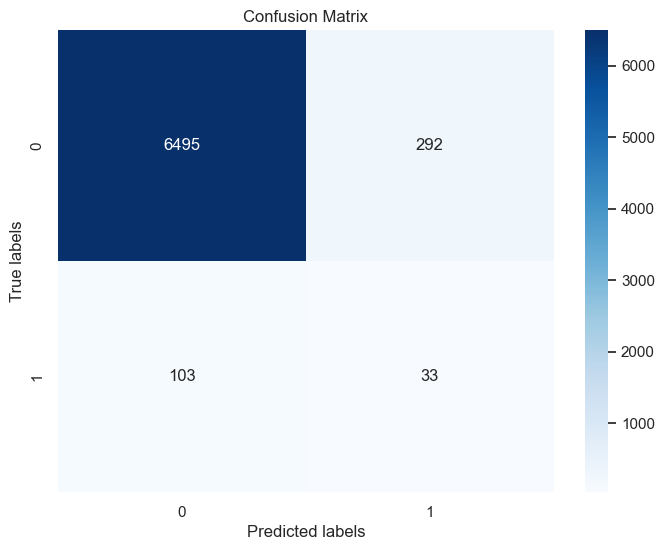

In [ ]:
# Предсказание на тестовой выборке
pred = best_model_xgb.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Получение предсказанных вероятностей для каждого класса
pred_xgb = best_model_xgb.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
pred_xgb_class_1 = pred_xgb[:, 1]

In [ ]:
# Расчет AUC-ROC
auc_xgb_pred = roc_auc_score(y_test,pred_xgb_class_1)
print(f"AUC-ROC_XGB_1: {auc_xgb_pred}")


AUC-ROC_XGB_1: 0.808603602041966


***Прогнозирование f1_class_1***

In [ ]:
def objective(trial):
    # Определение параметров
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1.0)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_loguniform('gamma', 1e-3, 100.0)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    max_delta_step = trial.suggest_int('max_delta_step', 0, 10)

    # Создание модели
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_delta_step=max_delta_step
    )

    # Обучение модели
    model.fit(X_train_over, y_train_over)

    # Предсказания
    preds = model.predict(X_test_sc)


    # F1 score для каждого класса
    f1_scores = f1_score(y_test, preds, average=None)

    # F1 score для класса 1
    f1_class_1 = f1_scores[1]

    return f1_class_1

# Создание исследования
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=1000)

best_trial_1 = study_1.best_trial

print(f"Best trial: {best_trial_1.number}")
print(f"  Value: {best_trial_1.value}")

print(" Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")


# Лучшие гиперпараметры
best_params_1 = study_1.best_trial.params
# Добавление параметра для GPU
best_params_1['tree_method'] = 'gpu_hist'

# Create the best model
best_model_xgb_1 = XGBClassifier(**best_params_1, verbosity=0)
best_model_xgb_1.fit(X_train_over, y_train_over)

# Вывод результатов
print("Лучшие найденные гиперпараметры:")
print("\nBest trial parameters: ", study_1.best_params)
print("Best trial f1_class_1 score: ", study_1.best_value)

[I 2024-01-09 14:44:42,194] A new study created in memory with name: no-name-aed4c07b-9648-418a-a89f-374109a6842e
[I 2024-01-09 14:44:42,346] Trial 0 finished with value: 0.12007504690431521 and parameters: {'n_estimators': 64, 'learning_rate': 0.044441694622980144, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 0.06546130517710937, 'subsample': 0.8248873666805823, 'colsample_bytree': 0.7637728629487697, 'max_delta_step': 10}. Best is trial 0 with value: 0.12007504690431521.
[I 2024-01-09 14:44:42,498] Trial 1 finished with value: 0.12286689419795223 and parameters: {'n_estimators': 60, 'learning_rate': 0.05348292676727977, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.04433842949455067, 'subsample': 0.6028898410048982, 'colsample_bytree': 0.95207678892862, 'max_delta_step': 6}. Best is trial 1 with value: 0.12286689419795223.
[I 2024-01-09 14:44:42,656] Trial 2 finished with value: 0.10725552050473186 and parameters: {'n_estimators': 131, 'learning_rate': 0.5330014272729805, 'max

Best trial: 357
  Value: 0.16401468788249696
 Params: 
    n_estimators: 228
    learning_rate: 0.06824655441824423
    max_depth: 10
    min_child_weight: 3
    gamma: 0.0010128333269816376
    subsample: 0.9996908246037367
    colsample_bytree: 0.7352246360137676
    max_delta_step: 1
Лучшие найденные гиперпараметры:

Best trial parameters:  {'n_estimators': 98, 'learning_rate': 0.025579129744263757, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.0030969732823649164, 'subsample': 0.8181836122930273, 'colsample_bytree': 0.7626548765834539, 'max_delta_step': 4}
Best trial f1_class_1 score:  0.16401468788249696


***Best trial parameters***:  {'n_estimators': 98, 'learning_rate': 0.025579129744263757, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.0030969732823649164, 'subsample': 0.8181836122930273, 'colsample_bytree': 0.7626548765834539, 'max_delta_step': 4}
Best trial f1_class_1 score:  0.16401468788249696

In [ ]:
best_params = {
    'n_estimators': 98,
    'learning_rate': 0.025579129744263757,
    'max_depth': 10,
    'min_child_weight': 6,
    'gamma': 0.0030969732823649164,
    'subsample': 0.8181836122930273,
    'colsample_bytree': 0.7626548765834539,
    'max_delta_step': 4
}

start_time = time.time()

best_model_xgb_1 = XGBClassifier(**best_params, verbosity=0)
best_model_xgb_1.fit(X_train_over, y_train_over)

fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")

Fit Time: 0.3119974136 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6787
           1       0.10      0.49      0.16       136

    accuracy                           0.90      6923
   macro avg       0.54      0.70      0.56      6923
weighted avg       0.97      0.90      0.93      6923

Confusion Matrix:
[[6173  614]
 [  69   67]]


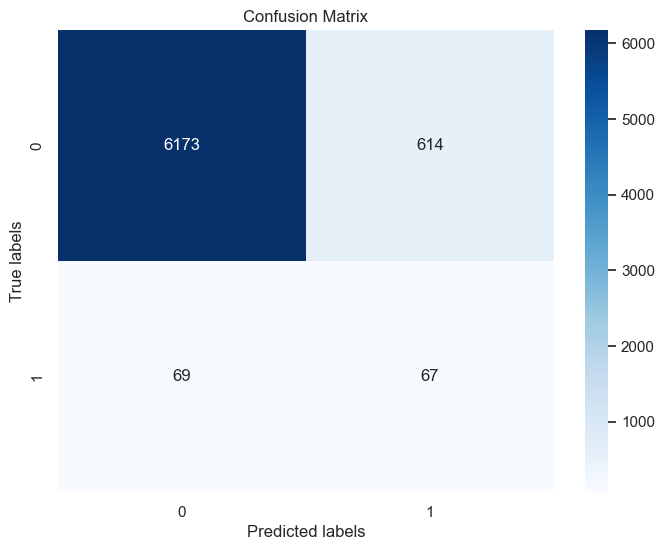

In [ ]:
# Предсказание на тестовой выборке
pred_1 = best_model_xgb_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, pred_1))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, pred_1)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Получение предсказанных вероятностей для каждого класса
pred_xgb_1 = best_model_xgb_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
pred_xgb_1_class_1 = pred_xgb_1[:, 1]

In [ ]:
# Расчет AUC-ROC
auc_xgb_1_pred = roc_auc_score(y_test,pred_xgb_1_class_1)
print(f"AUC-ROC_XGB_1_1: {auc_xgb_1_pred}")


AUC-ROC_XGB_1_1: 0.8111148909246917


# 2.Bagging

## Кросс Валидация



In [ ]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_over,
        y=y_train_over,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,23.959801,0.976399,0.996395,0.996422,0.996395,0.996395
SVC,363.362501,78.057773,0.837073,0.842447,0.837073,0.836432
DecisionTreeClassifier,0.993403,0.018899,0.997039,0.997057,0.997039,0.997039
KNeighborsClassifier,0.119800,19.999299,0.971218,0.972793,0.971218,0.971194


### Прогнозирование с DecisionTreeClassifier() параметры по умолчанию

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6787
           1       0.03      0.03      0.03       136

    accuracy                           0.96      6923
   macro avg       0.51      0.51      0.51      6923
weighted avg       0.96      0.96      0.96      6923

Confusion Matrix:
[[6673  114]
 [ 132    4]]


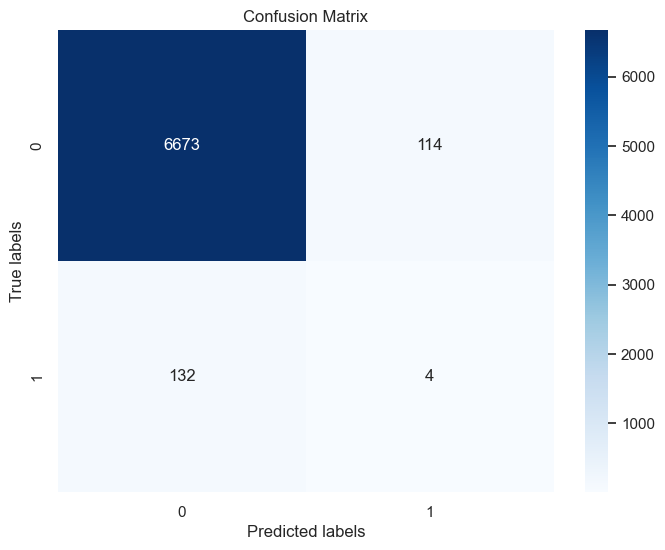

In [ ]:
# Обучение модели ансамбля
tree_model = DecisionTreeClassifier().fit(X_train_over, y_train_over)

# Предсказание на тестовой выборке
y_pred = tree_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Прогнозирование с RandomForestClassifier() параметры по умолчанию

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.05      0.01      0.01       136

    accuracy                           0.98      6923
   macro avg       0.51      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6767   20]
 [ 135    1]]


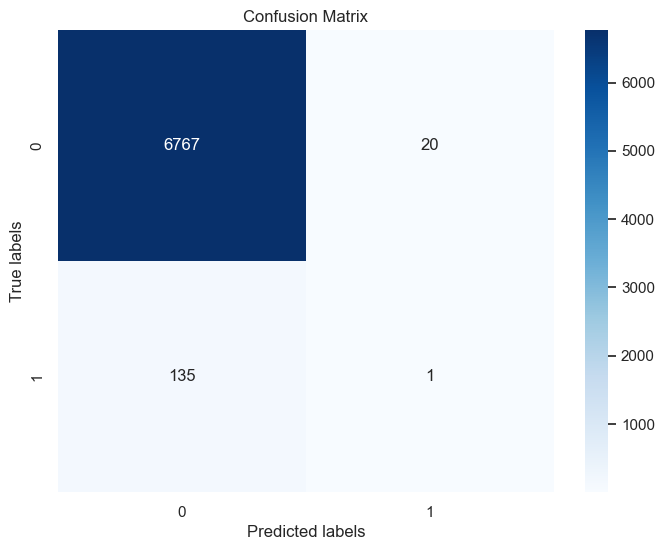

In [ ]:
# Обучение модели ансамбля
forest_model = RandomForestClassifier().fit(X_train_over, y_train_over)

# Предсказание на тестовой выборке
y_pred = forest_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random Undersampling

#Boosting

In [ ]:
list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_under,
        y=y_train_under,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,4.279443,0.008701,0.769901,0.777739,0.769745,0.768005
AdaBoostClassifier,0.091602,0.011600,0.740941,0.748827,0.740804,0.738507
XGBClassifier,0.172833,0.005000,0.734079,0.737689,0.733941,0.732914
LGBMClassifier,0.629500,0.006501,0.758950,0.763315,0.758843,0.757883
GradientBoostingClassifier,0.186103,0.004698,0.748970,0.756885,0.748804,0.746813


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      6787
           1       0.05      0.84      0.10       136

    accuracy                           0.70      6923
   macro avg       0.52      0.77      0.46      6923
weighted avg       0.98      0.70      0.81      6923

Confusion Matrix:
[[4755 2032]
 [  22  114]]


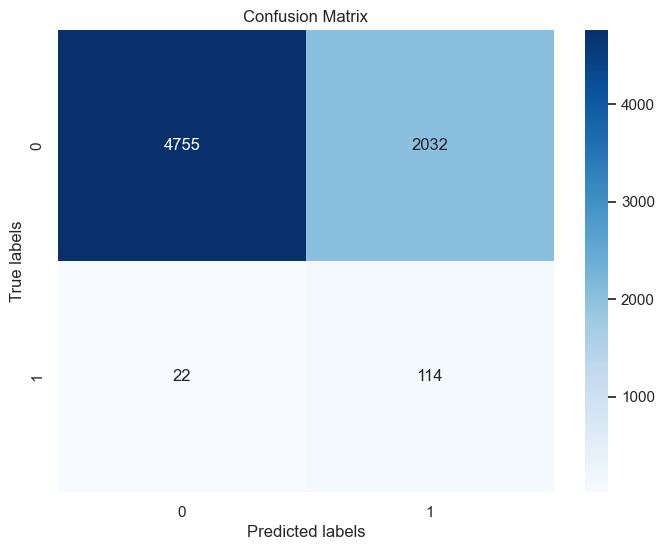

In [ ]:
# Обучение модели ансамбля
cat_model = CatBoostClassifier(verbose=False).fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = cat_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Bagging

In [ ]:
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

list_of_model_names = [type(x).__name__ for x in base_classifiers]

cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_under,
        y=y_train_under,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,1.992305,0.072500,0.772871,0.780865,0.772706,0.770889
SVC,0.114996,0.039606,0.766911,0.772646,0.766765,0.765536
DecisionTreeClassifier,0.045886,0.006421,0.734030,0.736487,0.733863,0.733037
KNeighborsClassifier,0.009271,0.205299,0.720050,0.723580,0.719882,0.718890


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      6787
           1       0.05      0.81      0.10       136

    accuracy                           0.71      6923
   macro avg       0.52      0.76      0.46      6923
weighted avg       0.98      0.71      0.81      6923

Confusion Matrix:
[[4790 1997]
 [  26  110]]


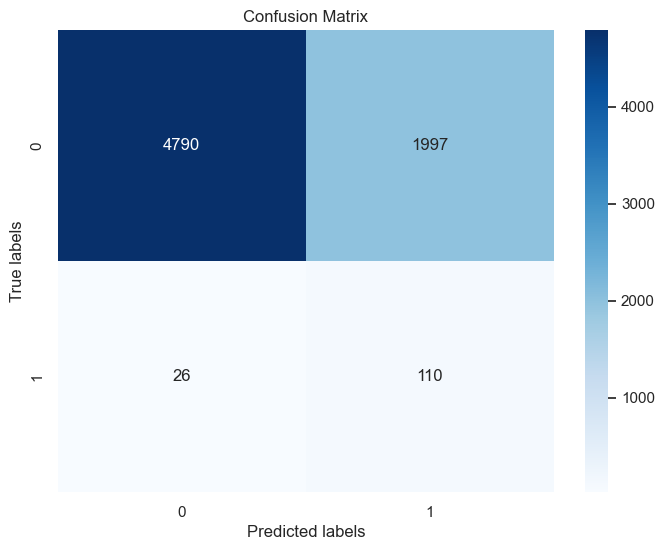

In [ ]:
# Обучение модели ансамбля
forest_model = RandomForestClassifier().fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = forest_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Stacking: bagging

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6787
           1       0.05      0.77      0.10       136

    accuracy                           0.73      6923
   macro avg       0.52      0.75      0.47      6923
weighted avg       0.98      0.73      0.83      6923

Confusion Matrix:
[[4951 1836]
 [  31  105]]


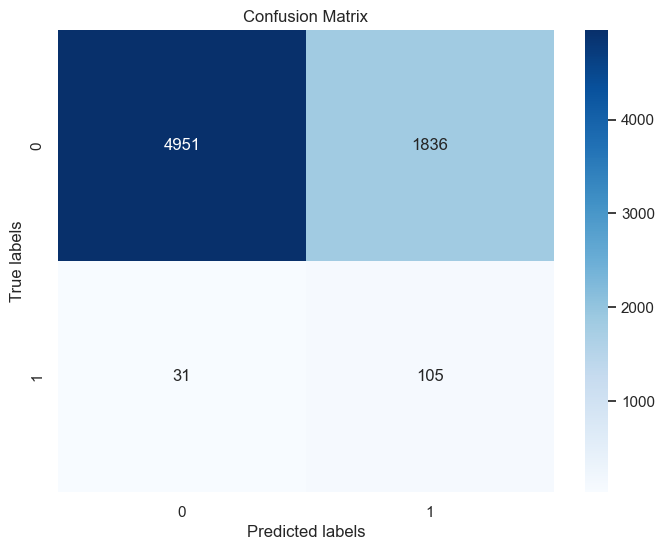

In [ ]:
 #Создание базовых моделей
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC()
model_3 = DecisionTreeClassifier()
model_4 = KNeighborsClassifier()

# Создание объекта EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting

# Обучение модели ансамбля
ensemble.fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = ensemble.predict(X_test_sc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      6787
           1       0.05      0.85      0.10       136

    accuracy                           0.70      6923
   macro avg       0.52      0.77      0.46      6923
weighted avg       0.98      0.70      0.81      6923

Confusion Matrix:
[[4733 2054]
 [  21  115]]


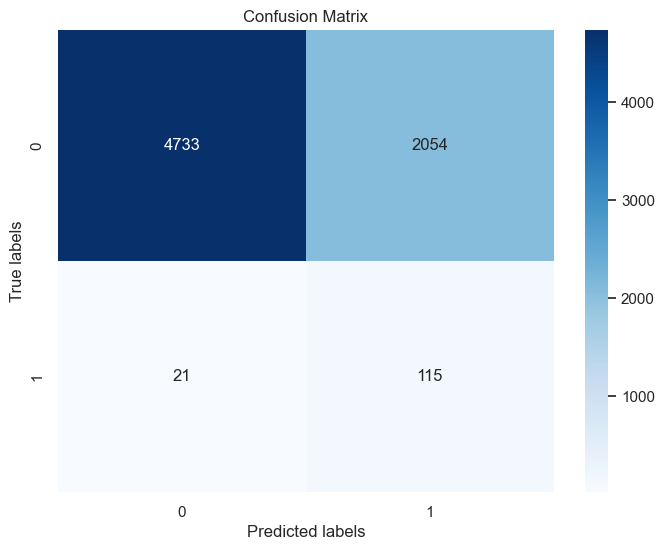

In [ ]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])

# Обучение модели ансамбля
ensemble.fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = ensemble.predict(X_test_sc)

## Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()